In [112]:
%load_ext autoreload
%autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import itertools
#import math
from matplotlib import style
sns.set(style="whitegrid")
#sns.set_context("paper")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3,"font.size":19, "axes.labelsize":19,
    "axes.titlesize":19})
#, "xtick.labelsize","ytick.labelsize", "legend.fontsize"
sns.set_color_codes()
from sklearn import tree
from sklearn.metrics import classification_report
import support_utils as sup
import data_explore_utils as dex
import al_plot_utils as alut

import eli5
import shap
import lime

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',100)

In [114]:
saving = False

### Read in Candsets

In [115]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})'
sep = ','
# ***********************************************

candsets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [116]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})_train'
sep = ','
# ***********************************************

candsets_train = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [117]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})_test'
sep = ','
# ***********************************************

candsets_test = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [118]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/books/'
pattern_of_filename = 'candset_(.{2,4}_.{2,4})_test'
sep = ','
# ***********************************************

candsets_org = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [119]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../datasets/books/'
pattern_of_filename = '(.{2,4})'
sep = ','
# ***********************************************

datasets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [120]:
datasets.keys()

dict_keys(['ban', 'half', 'bx', 'wor'])

In [121]:
candsets.keys()

dict_keys(['ban_bx', 'bx_wor', 'ban_half', 'wor_half', 'bx_half', 'ban_wor'])

In [122]:
candsets_org.keys()

dict_keys(['ban_wor', 'bx_wor', 'ban_bx', 'wor_half', 'bx_half', 'ban_half'])

##### Feature

In [123]:
all_feature = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pages_num_abs_diff_sim', 'pubdate_days_diff_sim',
       'pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'binding_exact_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

In [124]:
len(all_feature) == len(candsets['ban_bx'].columns.drop(['ids','label']))

True

In [125]:
# dense features for all combinations

# features excluded where the attribute has a very low density (<3%) for at 
# least one dataset that is involved either as source or target
rc_ban_bx_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_ban_bx_half = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_ban_half_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pages_num_abs_diff_sim', 'pubdate_days_diff_sim',
       'pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_bx_half_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

# assign the different feature sets (different dense features depending on combination)
dense_features_dict = {'ban_bx_wor':rc_ban_bx_wor,'ban_bx_half':rc_ban_bx_half,
                       'ban_half_wor':rc_ban_half_wor,'bx_half_wor':rc_bx_half_wor,
                       'ban_bx':rc_ban_bx_wor,'ban_half':rc_ban_half_wor,'ban_wor':rc_ban_half_wor,
                       'bx_half':rc_bx_half_wor,'bx_wor':rc_bx_half_wor,'wor_half':rc_ban_half_wor}

In [126]:
datatype_dict = sup.importJSONFileInDict('./input/books_type_per_column.json')

In [127]:
datatype_dict

{'author': 'str',
 'binding': 'custom',
 'pages': 'num',
 'pubdate': 'date',
 'publisher': 'str',
 'title': 'str'}

### Data source-level

In [128]:
dfs_d_vp = {}
for df in datasets:
    ser = pd.Series(1-datasets[df].replace(-1,np.nan).isnull().sum()/len(datasets[df]))
    ser.index = [x.split('_')[1] for x in ser.index]
    ser.drop(index=['id','isbn'],inplace=True)
    ser2 = pd.Series(1-datasets[df].replace(-1,np.nan).nunique()/len(datasets[df]))
    ser2.index = [x.split('_')[1] for x in ser2.index]
    ser2.drop(index=['id','isbn'],inplace=True)
    df1 = pd.DataFrame(ser,columns=['Density'])
    df2 = pd.DataFrame(ser2,columns=['Value Overlap'])
    temp = pd.merge(df1,df2,left_index=True,right_index=True)
    temp['attr'] = temp.index
    dfs_d_vp.update({df:pd.melt(temp, id_vars='attr', var_name="dimension", value_name="values")})

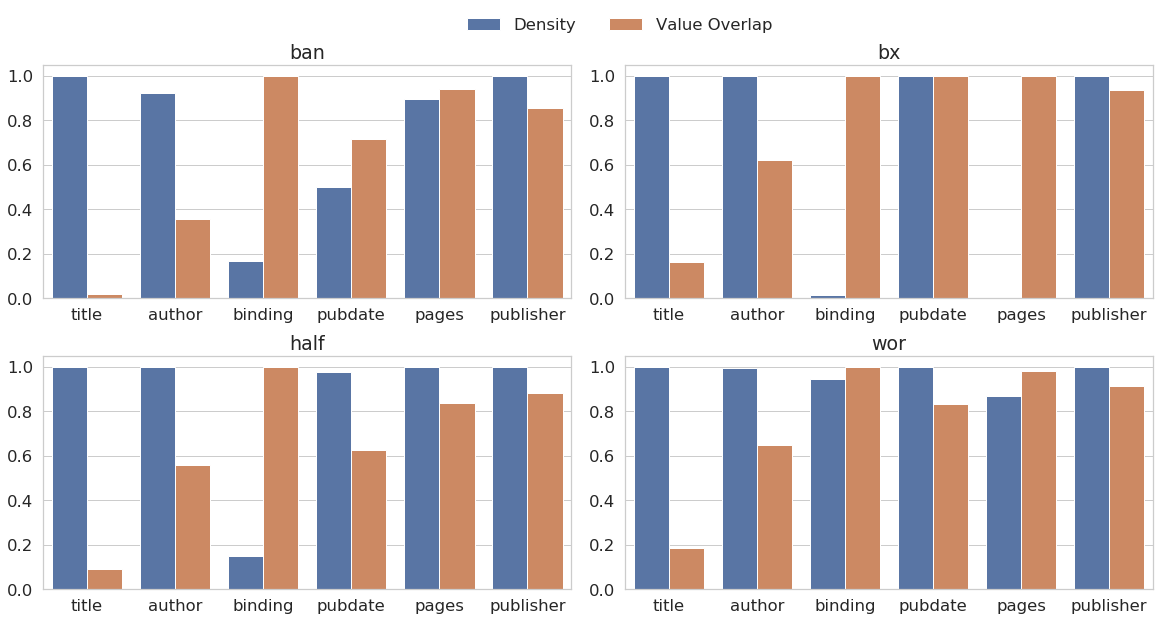

In [129]:
fig,axes = plt.subplots(2,2,figsize=(16,8),constrained_layout=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['ban'],hue='dimension',ax=axes[0][0])
axes[0][0].set_title('ban')
g.legend_.remove()
axes[0][0].set_ylabel('')
axes[0][0].set_xlabel('')
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['bx'],hue='dimension',ax=axes[0][1])
axes[0][1].set_title('bx')
g.legend_.remove()
axes[0][1].set_ylabel('')
axes[0][1].set_xlabel('')
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['half'],hue='dimension',ax=axes[1][0])
axes[1][0].set_title('half')
g.legend_.remove()
axes[1][0].set_ylabel('')
axes[1][0].set_xlabel('')
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['wor'],hue='dimension',ax=axes[1][1])
axes[1][1].set_title('wor')
g.legend_.remove()
axes[1][1].set_ylabel('')
axes[1][1].set_xlabel('')
#plt.legend(loc='best')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)
#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
#            borderaxespad=0, frameon=False)
#fig.suptitle('Attribute Profiling')
#fig.savefig('../results/data_profiling/books_dslevel_den_vp.png',dpi=600,bbox_inches='tight')

##### Calculate and plot avg length per attribute

In [130]:
result = pd.DataFrame()
for df in datasets:
    ds = datasets[df].drop(columns=[df+'_id',df+'_isbn'])
    ds.replace(np.nan,'nan',inplace=True)
    ds[df+'_pages'].replace(-1,np.nan,inplace=True)
    temp = pd.DataFrame()
    temp['source'] = ds.apply(lambda x: df,axis=1)
    for col in ds:
        if(col!=df+'_pages'):
            temp[col.split('_')[1]] = ds[col].apply(lambda s: len(s) if s!='nan' else np.nan)
        else:
            temp[col.split('_')[1]] = ds[col]
    result = result.append(temp)
result = pd.melt(result, id_vars='source', var_name="attr", value_name="values")

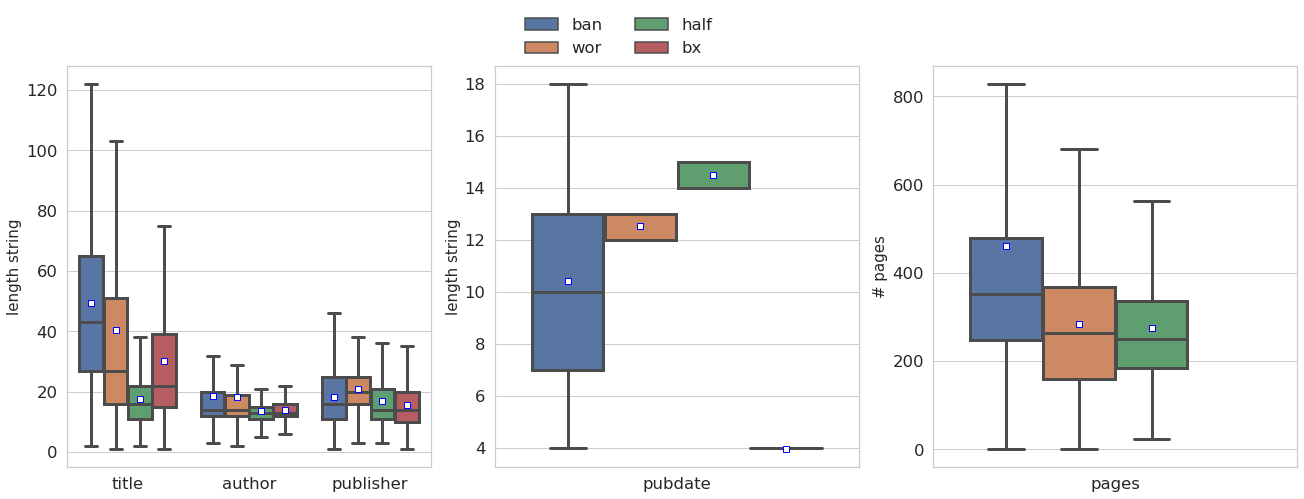

In [131]:
fig,axes = plt.subplots(1,3,figsize=(18,6),constrained_layout=True)

palette ={'ban':'C0','wor':'C1','half':'C2','bx':'C3'}
hue_order =['ban','wor','half','bx']
g = sns.boxplot(x='attr',y='values',data=result[(result['attr']!='pages') & (result['attr']!='binding') & (result['attr']!='pubdate')],hue='source',ax=axes[0], showfliers = False,showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order=hue_order)
g.legend_.remove()
axes[0].set_ylabel('length string',fontsize=15)
axes[0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=result[(result['attr']=='pubdate')],hue='source',ax=axes[1], showfliers = False,showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order=hue_order)
g.legend_.remove()
axes[1].set_ylabel('length string',fontsize=15)
axes[1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=result[(result['attr']=='pages')],hue='source',ax=axes[2], showfliers = False,showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order=hue_order)
g.legend_.remove()
axes[2].set_ylabel('# pages',fontsize=15)
axes[2].set_xlabel('')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)

#fig.suptitle('Attribute Length')
fig.savefig('../results/data_profiling/books_dslevel_attr_length.png',dpi=600,bbox_inches='tight')

### Candidate set-level

In [132]:
results_den = {}
for df in candsets:
    temp = []
    for attr in datatype_dict:
        #shape = candsets[df].replace(-1,np.nan).filter(regex=attr).shape
        temp.append((attr,'non-match',1-(candsets[df][candsets[df]['label']==0].replace(-1,np.nan).filter(regex=attr).iloc[:,0].isnull().sum()/candsets[df][candsets[df]['label']==0].shape[0])))
        temp.append((attr,'match',1-(candsets[df][candsets[df]['label']==1].replace(-1,np.nan).filter(regex=attr).iloc[:,0].isnull().sum()/candsets[df][candsets[df]['label']==1].shape[0])))
        final_df = pd.DataFrame(temp,columns=['attr','label','density'])
    results_den.update({df:final_df})

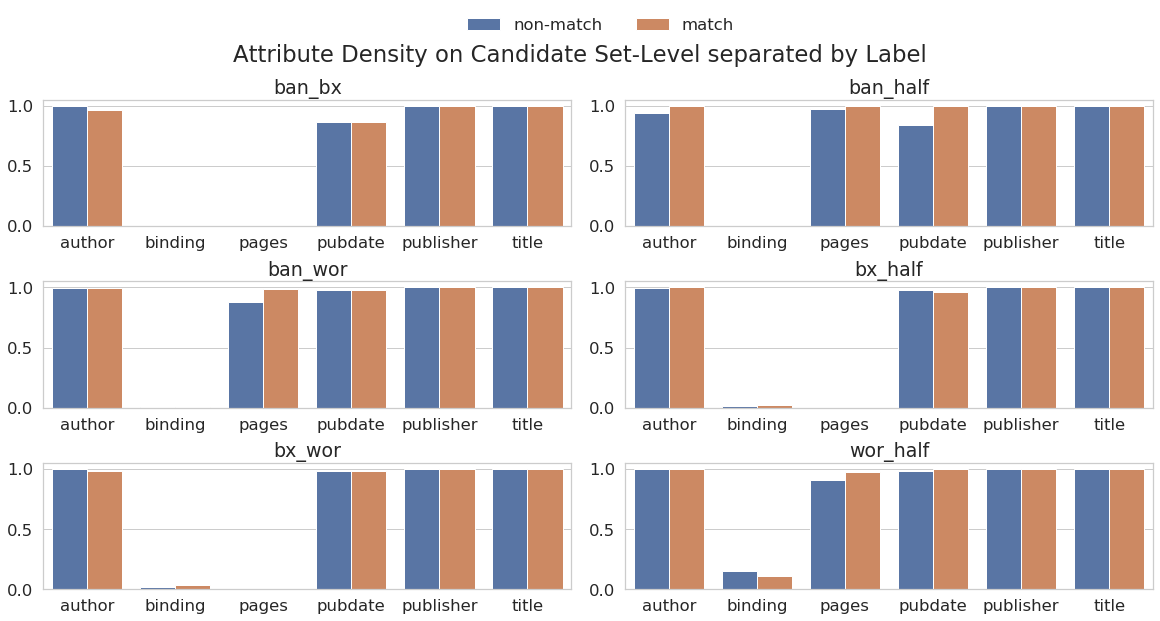

In [133]:
fig,axes = plt.subplots(3,2,figsize=(16,8),constrained_layout=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g = sns.barplot(x='attr',y='density',data=results_den['ban_bx'],hue='label',ax=axes[0][0])
axes[0][0].set_title('ban_bx')
g.legend_.remove()
axes[0][0].set_ylabel('')
axes[0][0].set_xlabel('')
g = sns.barplot(x='attr',y='density',data=results_den['ban_half'],hue='label',ax=axes[0][1])
axes[0][1].set_title('ban_half')
g.legend_.remove()
axes[0][1].set_ylabel('')
axes[0][1].set_xlabel('')
g = sns.barplot(x='attr',y='density',data=results_den['ban_wor'],hue='label',ax=axes[1][0])
axes[1][0].set_title('ban_wor')
g.legend_.remove()
axes[1][0].set_ylabel('')
axes[1][0].set_xlabel('')
g = sns.barplot(x='attr',y='density',data=results_den['bx_half'],hue='label',ax=axes[1][1])
axes[1][1].set_title('bx_half')
g.legend_.remove()
axes[1][1].set_ylabel('')
axes[1][1].set_xlabel('')
g = sns.barplot(x='attr',y='density',data=results_den['bx_wor'],hue='label',ax=axes[2][0])
axes[2][0].set_title('bx_wor')
g.legend_.remove()
axes[2][0].set_ylabel('')
axes[2][0].set_xlabel('')
g = sns.barplot(x='attr',y='density',data=results_den['wor_half'],hue='label',ax=axes[2][1])
axes[2][1].set_title('wor_half')
g.legend_.remove()
axes[2][1].set_ylabel('')
axes[2][1].set_xlabel('')
#plt.legend(loc='best')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)
#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
#            borderaxespad=0, frameon=False)
fig.suptitle('Attribute Density on Candidate Set-Level separated by Label')
fig.savefig('../results/data_profiling/books_cslevel_attr_density_hue.png',dpi=600,bbox_inches='tight')

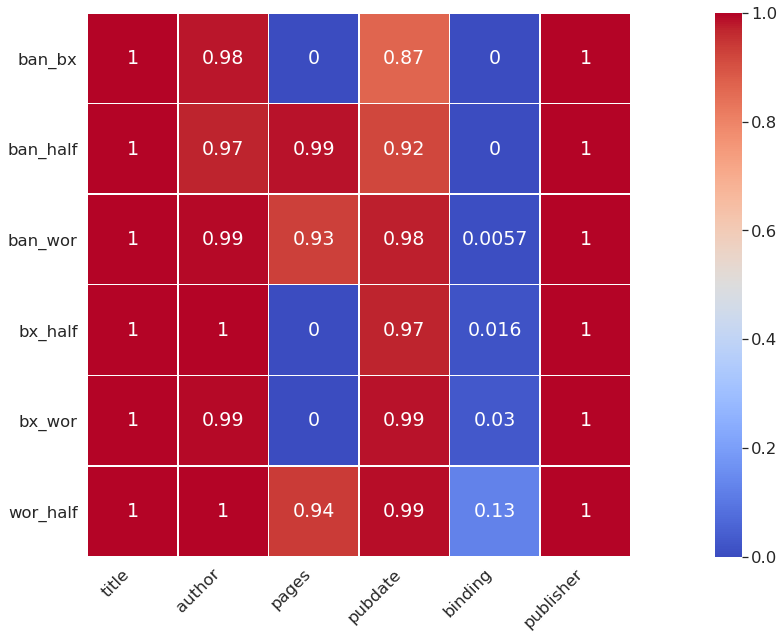

In [134]:
all_nan_share = []
for i,df in enumerate(candsets):
    if(i==0):
        temp = candsets[df].copy()
        temp['source'] = temp.iloc[:,0].apply(lambda x: df)
        final = temp
    temp = candsets[df].copy()
    temp['source'] = temp.iloc[:,0].apply(lambda x: df)
    final = final.append(temp)
try:
    #final.drop(columns='ids',inplace=True)
    final.drop(columns='label',inplace=True)
except KeyError:
    pass
all_nan_share = final.replace(-1,np.nan).groupby('source').count().div(final.replace(-1,np.nan).groupby('source').count().iloc[:,0],axis='index')
#attributes = list(set([s.split('_')[0] for s in list(all_nan_share.columns) if (s != 'ids' or s !='label')]))
mapper = {}
for col in final.columns:
    mapper.update({col:col.split('_')[0]})
all_nan_share.rename(columns=mapper,inplace=True)
all_nan_share = all_nan_share.loc[:,~all_nan_share.columns.duplicated()]
plt.figure(figsize=(30,10))
g = sns.heatmap(all_nan_share.drop(columns='ids'),annot=True,square=True,cmap='coolwarm',linewidths=.5)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
#g.set_title('Density of Attributes for all Candidate Sets')
g.set_ylabel('')
fig = g.get_figure()
fig.savefig('../results/data_profiling/books_cslevel_attr_density_heatmap.png',dpi=600,bbox_inches='tight')

In [135]:
results_non_agg = {}
for df in candsets:
    temp = pd.DataFrame()
    #temp['source'] = candsets[df].apply(lambda x: df,axis=1)
    temp['label']  = candsets[df]['label'].apply(lambda s: 'match' if s==1 else 'non-match')
    for attr in datatype_dict:
        #shape = candsets[df].replace(-1,np.nan).filter(regex=attr).shape
        temp[attr] = candsets[df].replace(-1,np.nan).filter(regex=attr).mean(axis=1,skipna=True)
    results_non_agg.update({df:pd.melt(temp, id_vars='label', var_name="attr", value_name="values")})

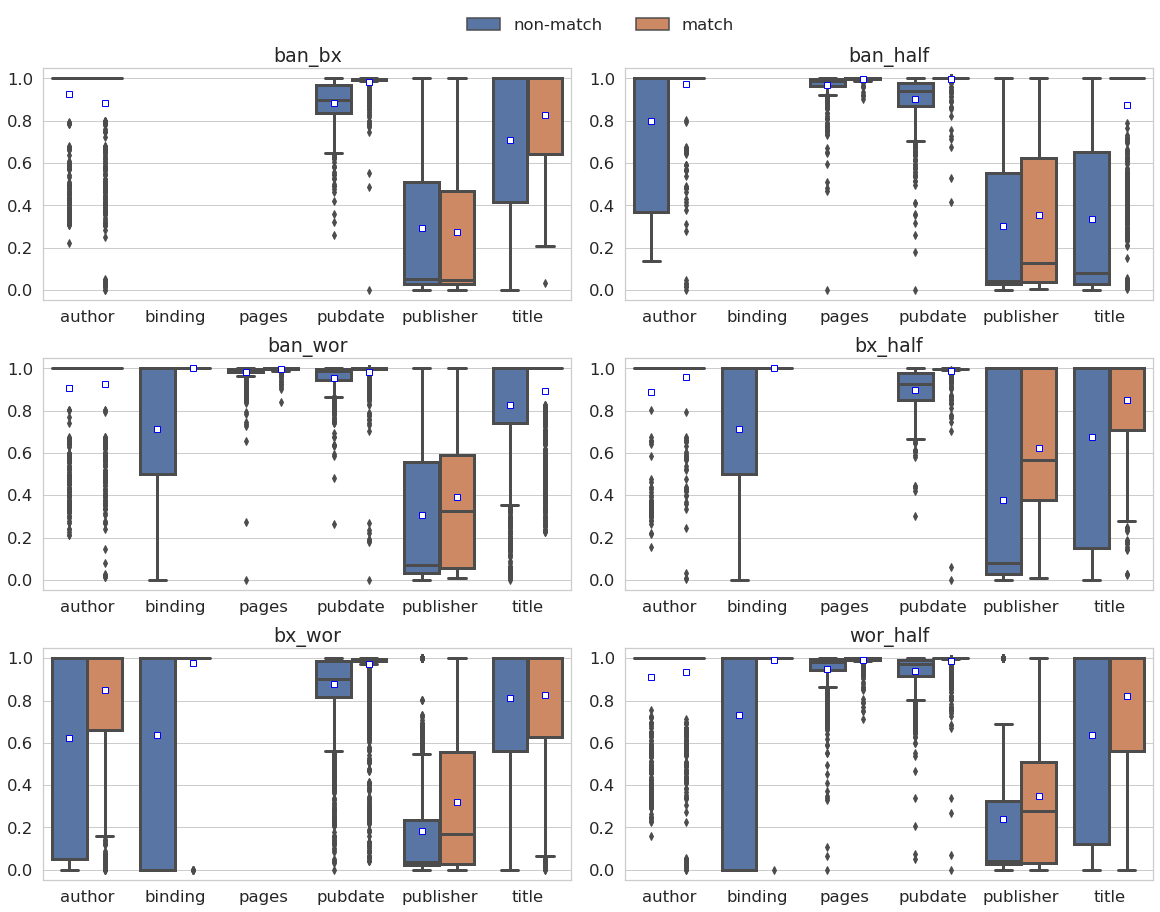

In [136]:
fig,axes = plt.subplots(3,2,figsize=(16,12),constrained_layout=True)

palette ={'non-match':'C0','match':'C1'}
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g = sns.boxplot(x='attr',y='values',data=results_non_agg['ban_bx'],hue='label',ax=axes[0][0],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['non-match', 'match'])
axes[0][0].set_title('ban_bx')
g.legend_.remove()
axes[0][0].set_ylabel('')
axes[0][0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['ban_half'],hue='label',ax=axes[0][1],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['non-match', 'match'])
axes[0][1].set_title('ban_half')
g.legend_.remove()
axes[0][1].set_ylabel('')
axes[0][1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['ban_wor'],hue='label',ax=axes[1][0],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['non-match', 'match'])
axes[1][0].set_title('ban_wor')
g.legend_.remove()
axes[1][0].set_ylabel('')
axes[1][0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['bx_half'],hue='label',ax=axes[1][1],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['non-match', 'match'])
axes[1][1].set_title('bx_half')
g.legend_.remove()
axes[1][1].set_ylabel('')
axes[1][1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['bx_wor'],hue='label',ax=axes[2][0],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['non-match', 'match'])
axes[2][0].set_title('bx_wor')
g.legend_.remove()
axes[2][0].set_ylabel('')
axes[2][0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['wor_half'],hue='label',ax=axes[2][1],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette=palette,
                hue_order= ['non-match', 'match'])
axes[2][1].set_title('wor_half')
g.legend_.remove()
axes[2][1].set_ylabel('')
axes[2][1].set_xlabel('')
#plt.legend(loc='best')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)
#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
#            borderaxespad=0, frameon=False)
#fig.suptitle('Agg. Sim Scores per Attribute separated by Label')
#fig.savefig('../results/data_profiling/books_cslevel_agg_sim_score_hue.png',dpi=600,bbox_inches='tight')

Text(0.5, 0.98, 'Agg. Sim Scores per Attribute')

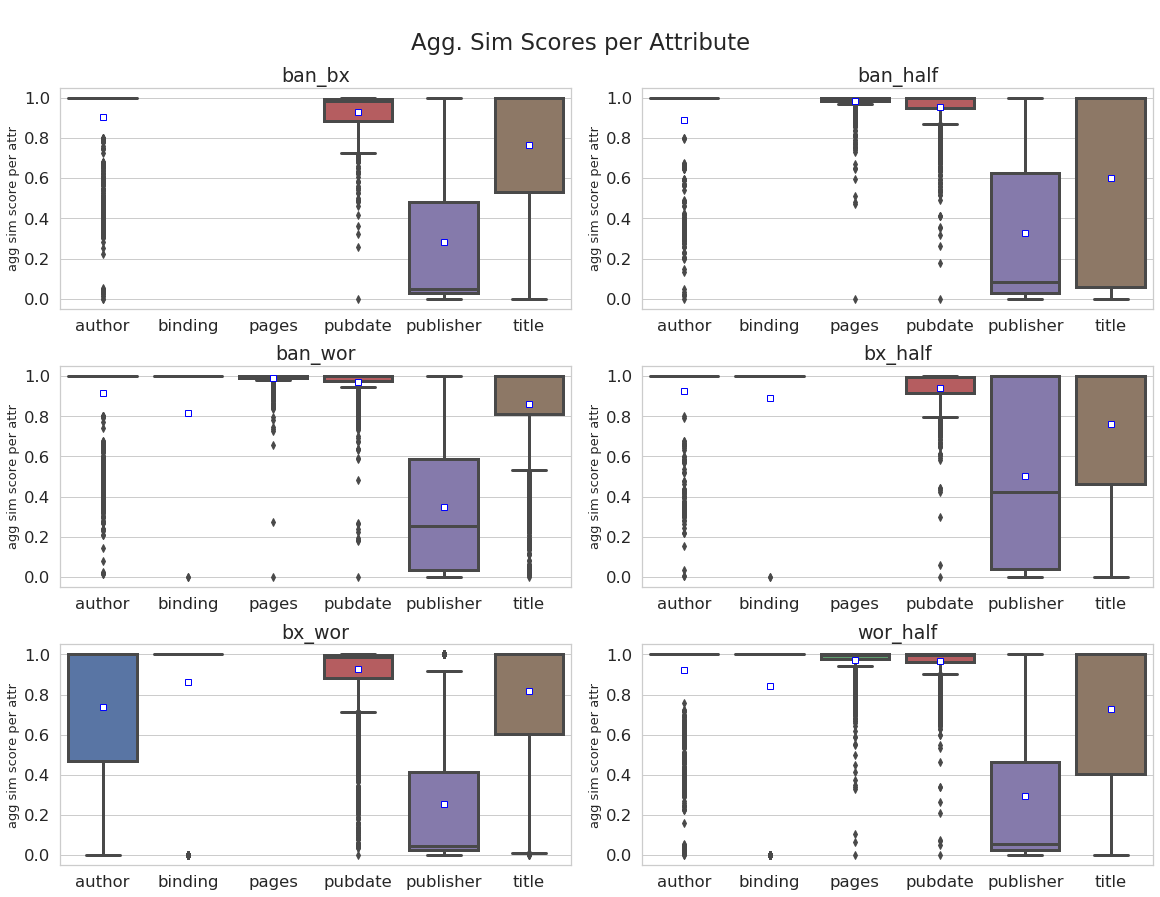

In [137]:
fig,axes = plt.subplots(3,2,figsize=(16,12),constrained_layout=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g = sns.boxplot(x='attr',y='values',data=results_non_agg['ban_bx'],ax=axes[0][0],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[0][0].set_title('ban_bx')
#g.legend_.remove()
axes[0][0].set_ylabel('agg sim score per attr',fontsize=13)
axes[0][0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['ban_half'],ax=axes[0][1],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[0][1].set_title('ban_half')
#g.legend_.remove()
axes[0][1].set_ylabel('agg sim score per attr',fontsize=13)
axes[0][1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['ban_wor'],ax=axes[1][0],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[1][0].set_title('ban_wor')
#g.legend_.remove()
axes[1][0].set_ylabel('agg sim score per attr',fontsize=13)
axes[1][0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['bx_half'],ax=axes[1][1],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[1][1].set_title('bx_half')
#g.legend_.remove()
axes[1][1].set_ylabel('agg sim score per attr',fontsize=13)
axes[1][1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['bx_wor'],ax=axes[2][0],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[2][0].set_title('bx_wor')
#g.legend_.remove()
axes[2][0].set_ylabel('agg sim score per attr',fontsize=13)
axes[2][0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['wor_half'],ax=axes[2][1],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[2][1].set_title('wor_half')
#g.legend_.remove()
axes[2][1].set_ylabel('agg sim score per attr',fontsize=13)
axes[2][1].set_xlabel('')
#plt.legend(loc='best')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)
#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
#            borderaxespad=0, frameon=False)
fig.suptitle('Agg. Sim Scores per Attribute')
#fig.savefig('../results/data_profiling/books_cslevel_agg_sim_score.png',dpi=600,bbox_inches='tight')

## Data Profiling of Correspondences Set (aka candset)

### Data Profiling ban_bx

In [138]:
ds1_name = 'ban'
ds2_name = 'bx'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

###### Training Set

In [139]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [140]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=ban ds2=bx Training Set
#ds1,17629
#ds2,270948
#record_pairs,936
#attr,6
#non-match,468
#match,468
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,3
#long_string_attr,0


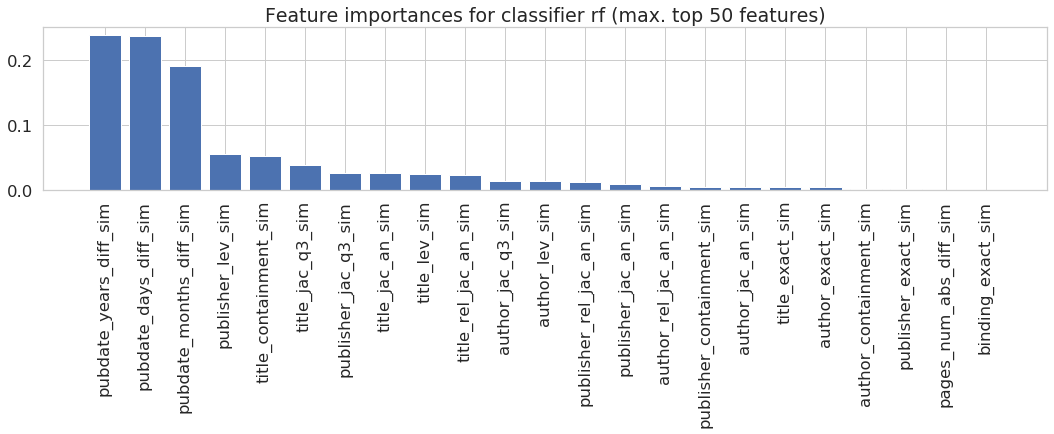

In [141]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [142]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: ban_bx Training Set
matching_relevant_features,"['pubdate_years_diff_sim', 'pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'publisher_lev_sim', 'title_containment_sim', 'title_jac_q3_sim', 'publisher_jac_q3_sim', 'title_jac_an_sim', 'title_lev_sim', 'title_rel_jac_an_sim', 'author_jac_q3_sim', 'author_lev_sim', 'publisher_rel_jac_an_sim', 'publisher_jac_an_sim', 'author_rel_jac_an_sim', 'publisher_containment_sim', 'author_jac_an_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'author', 'pubdate', 'title', 'publisher'}"
matching_relevant_attributes_count,4
matching_relevant_attributes_density,0.970000
top_matching_relevant_features_count,1
F1_xval_max,0.900000
F1_xval_top_matching_relevant_features,0.860000
top_matching_relevant_features,['pubdate_years_diff_sim']
top_relevant_attributes,{'pubdate'}


###### Test Set

In [143]:
candsets_test[combo][candsets_test[combo]['ids']=='ban_16271_bx_221379']

,ids,title_lev_sim,title_jac_q3_sim,title_jac_an_sim,title_rel_jac_an_sim,title_containment_sim,title_exact_sim,author_lev_sim,author_jac_q3_sim,author_jac_an_sim,author_rel_jac_an_sim,author_containment_sim,author_exact_sim,pages_num_abs_diff_sim,pubdate_days_diff_sim,pubdate_months_diff_sim,pubdate_years_diff_sim,binding_exact_sim,publisher_lev_sim,publisher_jac_q3_sim,publisher_jac_an_sim,publisher_rel_jac_an_sim,publisher_containment_sim,publisher_exact_sim,label
117,ban_16271_bx_221379,0.733333,0.673469,0.75,0.75,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.996736,0.996686,1.0,-1.0,0.8,0.631579,0.333333,0.333333,0.5,0.0,1


In [144]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [145]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=ban ds2=bx Test Set
#ds1,17629
#ds2,270948
#record_pairs,462
#attr,6
#non-match,231
#match,231
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,3
#long_string_attr,0


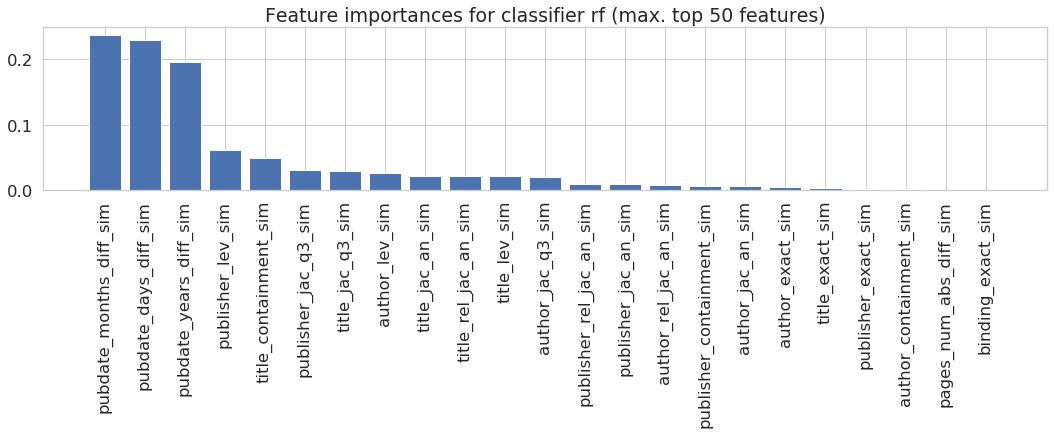

In [146]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [147]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: ban_bx Test Set
matching_relevant_features,"['pubdate_months_diff_sim', 'pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'publisher_lev_sim', 'title_containment_sim', 'publisher_jac_q3_sim', 'title_jac_q3_sim', 'author_lev_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'author_jac_q3_sim', 'publisher_rel_jac_an_sim', 'publisher_jac_an_sim', 'author_rel_jac_an_sim', 'publisher_containment_sim', 'author_jac_an_sim', 'author_exact_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'author', 'pubdate', 'title', 'publisher'}"
matching_relevant_attributes_count,4
matching_relevant_attributes_density,0.980000
top_matching_relevant_features_count,4
F1_xval_max,0.800000
F1_xval_top_matching_relevant_features,0.790000
top_matching_relevant_features,"['pubdate_months_diff_sim', 'pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'publisher_lev_sim']"
top_relevant_attributes,"{'pubdate', 'publisher'}"


#### The whole Dataset

In [148]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [149]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=ban ds2=bx Whole Set
#ds1,17629
#ds2,270948
#record_pairs,1398
#attr,6
#non-match,699
#match,699
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,3
#long_string_attr,0


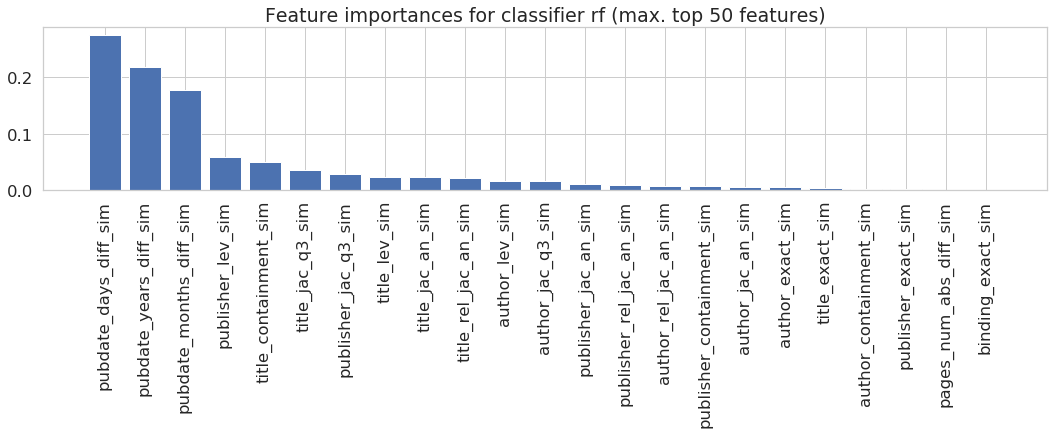

In [150]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [151]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: ban_bx Whole Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'pubdate_months_diff_sim', 'publisher_lev_sim', 'title_containment_sim', 'title_jac_q3_sim', 'publisher_jac_q3_sim', 'title_lev_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'author_lev_sim', 'author_jac_q3_sim', 'publisher_jac_an_sim', 'publisher_rel_jac_an_sim', 'author_rel_jac_an_sim', 'publisher_containment_sim', 'author_jac_an_sim', 'author_exact_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'author', 'pubdate', 'title', 'publisher'}"
matching_relevant_attributes_count,4
matching_relevant_attributes_density,0.970000
top_matching_relevant_features_count,1
F1_xval_max,0.860000
F1_xval_top_matching_relevant_features,0.820000
top_matching_relevant_features,['pubdate_days_diff_sim']
top_relevant_attributes,{'pubdate'}


In [152]:
candsets.keys()

dict_keys(['ban_bx', 'bx_wor', 'ban_half', 'wor_half', 'bx_half', 'ban_wor'])

### Data Profiling bx_wor

In [153]:
ds1_name = 'bx'
ds2_name = 'wor'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

###### Training Set

In [154]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [155]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=bx ds2=wor Training Set
#ds1,270948
#ds2,48792
#record_pairs,12421
#attr,6
#non-match,6210
#match,6211
ratio_pos,0.50004
ratio_neg,0.49996
#short_string_attr,3
#long_string_attr,0


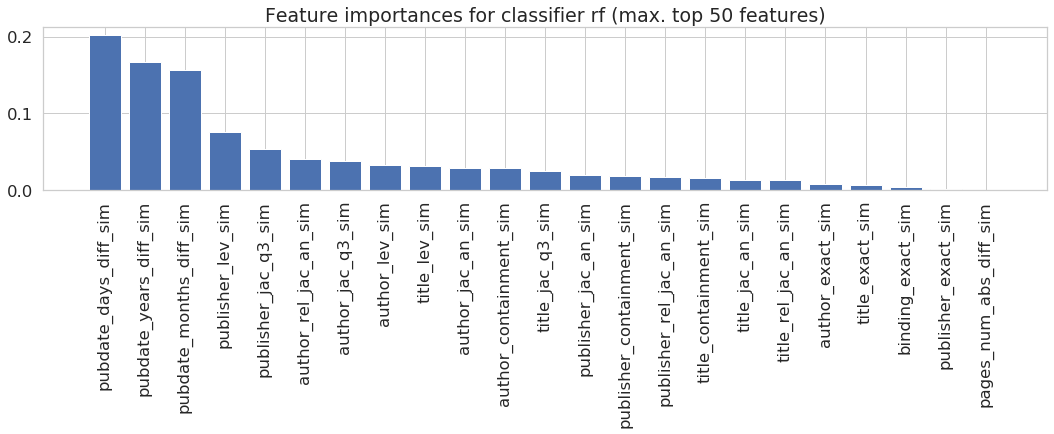

In [156]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [157]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: bx_wor Training Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'pubdate_months_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim', 'author_rel_jac_an_sim', 'author_jac_q3_sim', 'author_lev_sim', 'title_lev_sim', 'author_jac_an_sim', 'author_containment_sim', 'title_jac_q3_sim', 'publisher_jac_an_sim', 'publisher_containment_sim', 'publisher_rel_jac_an_sim', 'title_containment_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'author_exact_sim', 'title_exact_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'author', 'pubdate', 'title', 'publisher'}"
matching_relevant_attributes_count,4
matching_relevant_attributes_density,1.000000
top_matching_relevant_features_count,5
F1_xval_max,0.840000
F1_xval_top_matching_relevant_features,0.810000
top_matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'pubdate_months_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim']"
top_relevant_attributes,"{'pubdate', 'publisher'}"


###### Test Set

In [158]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [159]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=bx ds2=wor Test Set
#ds1,270948
#ds2,48792
#record_pairs,6119
#attr,6
#non-match,3060
#match,3059
ratio_pos,0.499918
ratio_neg,0.500082
#short_string_attr,3
#long_string_attr,0


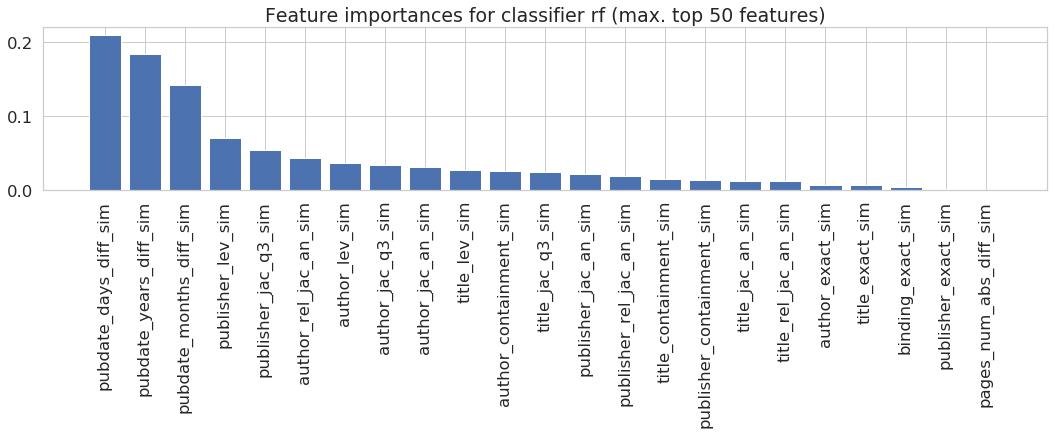

In [160]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [161]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: bx_wor Test Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'pubdate_months_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim', 'author_rel_jac_an_sim', 'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim', 'title_lev_sim', 'author_containment_sim', 'title_jac_q3_sim', 'publisher_jac_an_sim', 'publisher_rel_jac_an_sim', 'title_containment_sim', 'publisher_containment_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'author_exact_sim', 'title_exact_sim', 'binding_exact_sim']"
matching_relevant_attributes_datatypes,"{'custom', 'date', 'str'}"
matching_relevant_attributes,"{'pubdate', 'binding', 'publisher', 'author', 'title'}"
matching_relevant_attributes_count,5
matching_relevant_attributes_density,0.950000
top_matching_relevant_features_count,5
F1_xval_max,0.820000
F1_xval_top_matching_relevant_features,0.790000
top_matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'pubdate_months_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim']"
top_relevant_attributes,"{'pubdate', 'publisher'}"


##### The whole dataset

In [162]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [163]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=bx ds2=wor Whole Set
#ds1,270948
#ds2,48792
#record_pairs,18540
#attr,6
#non-match,9270
#match,9270
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,3
#long_string_attr,0


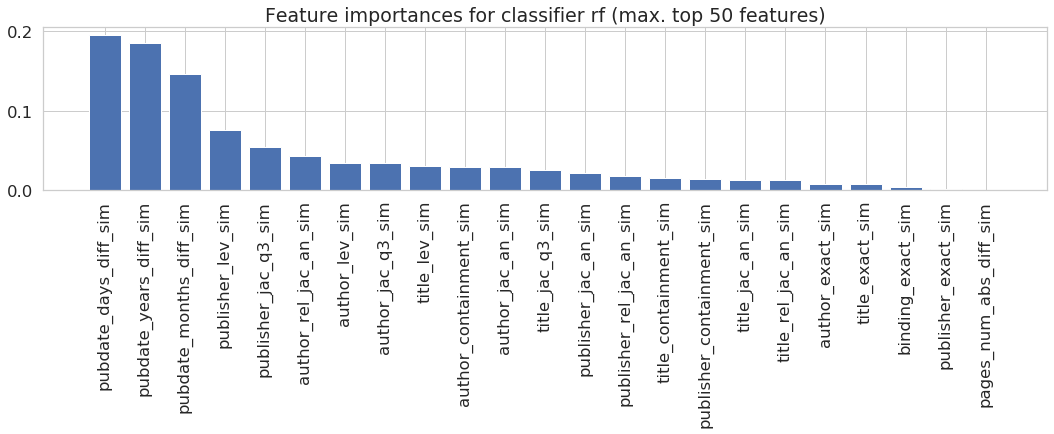

In [164]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [165]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: bx_wor Whole Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'pubdate_months_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim', 'author_rel_jac_an_sim', 'author_lev_sim', 'author_jac_q3_sim', 'title_lev_sim', 'author_containment_sim', 'author_jac_an_sim', 'title_jac_q3_sim', 'publisher_jac_an_sim', 'publisher_rel_jac_an_sim', 'title_containment_sim', 'publisher_containment_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'author_exact_sim', 'title_exact_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'author', 'pubdate', 'title', 'publisher'}"
matching_relevant_attributes_count,4
matching_relevant_attributes_density,1.000000
top_matching_relevant_features_count,5
F1_xval_max,0.850000
F1_xval_top_matching_relevant_features,0.810000
top_matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'pubdate_months_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim']"
top_relevant_attributes,"{'pubdate', 'publisher'}"


### Data Profiling ban_half

In [166]:
ds1_name = 'ban'
ds2_name = 'half'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

###### Training Set

In [167]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [168]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=ban ds2=half Training Set
#ds1,17629
#ds2,3099
#record_pairs,1187
#attr,6
#non-match,593
#match,594
ratio_pos,0.500421
ratio_neg,0.499579
#short_string_attr,3
#long_string_attr,0


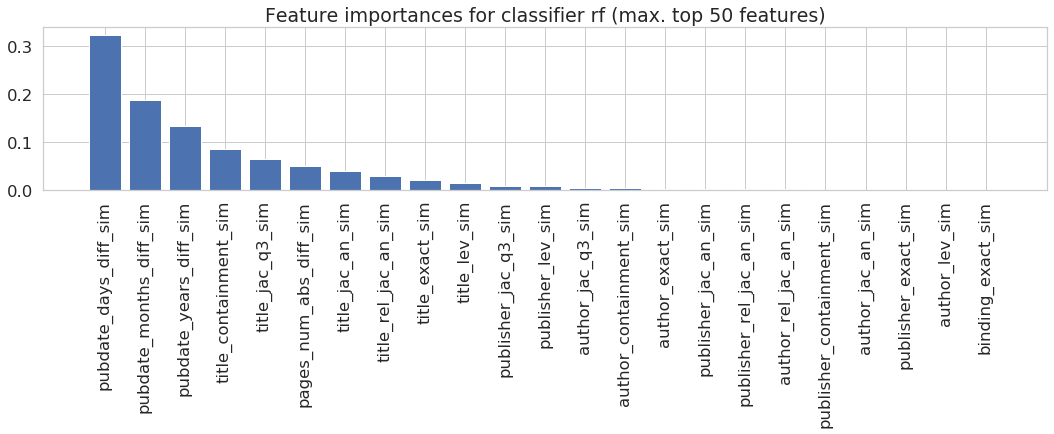

In [169]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [170]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: ban_half Training Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'title_containment_sim', 'title_jac_q3_sim', 'pages_num_abs_diff_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_exact_sim', 'title_lev_sim', 'publisher_jac_q3_sim', 'publisher_lev_sim', 'author_jac_q3_sim']"
matching_relevant_attributes_datatypes,"{'date', 'num', 'str'}"
matching_relevant_attributes,"{'pubdate', 'pages', 'publisher', 'author', 'title'}"
matching_relevant_attributes_count,5
matching_relevant_attributes_density,0.980000
top_matching_relevant_features_count,1
F1_xval_max,0.960000
F1_xval_top_matching_relevant_features,0.940000
top_matching_relevant_features,['pubdate_days_diff_sim']
top_relevant_attributes,{'pubdate'}


###### Test Set

In [171]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [172]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=ban ds2=half Test Set
#ds1,17629
#ds2,3099
#record_pairs,585
#attr,6
#non-match,293
#match,292
ratio_pos,0.499145
ratio_neg,0.500855
#short_string_attr,3
#long_string_attr,0


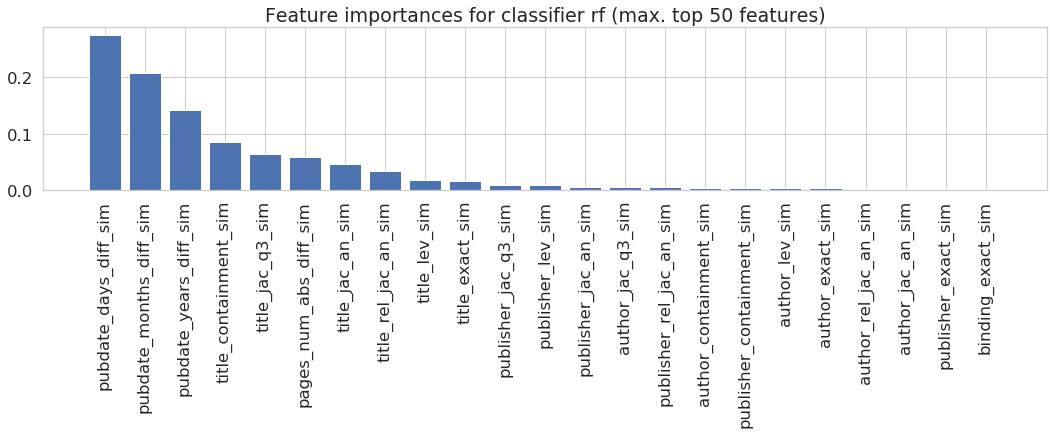

In [173]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [174]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: ban_half Test Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'title_containment_sim', 'title_jac_q3_sim', 'pages_num_abs_diff_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'title_exact_sim', 'publisher_jac_q3_sim', 'publisher_lev_sim', 'publisher_jac_an_sim', 'author_jac_q3_sim', 'publisher_rel_jac_an_sim']"
matching_relevant_attributes_datatypes,"{'date', 'num', 'str'}"
matching_relevant_attributes,"{'pubdate', 'pages', 'publisher', 'author', 'title'}"
matching_relevant_attributes_count,5
matching_relevant_attributes_density,0.980000
top_matching_relevant_features_count,1
F1_xval_max,0.970000
F1_xval_top_matching_relevant_features,0.950000
top_matching_relevant_features,['pubdate_days_diff_sim']
top_relevant_attributes,{'pubdate'}


##### The whole Dataset

In [175]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [176]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=ban ds2=half Whole Set
#ds1,17629
#ds2,3099
#record_pairs,1772
#attr,6
#non-match,886
#match,886
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,3
#long_string_attr,0


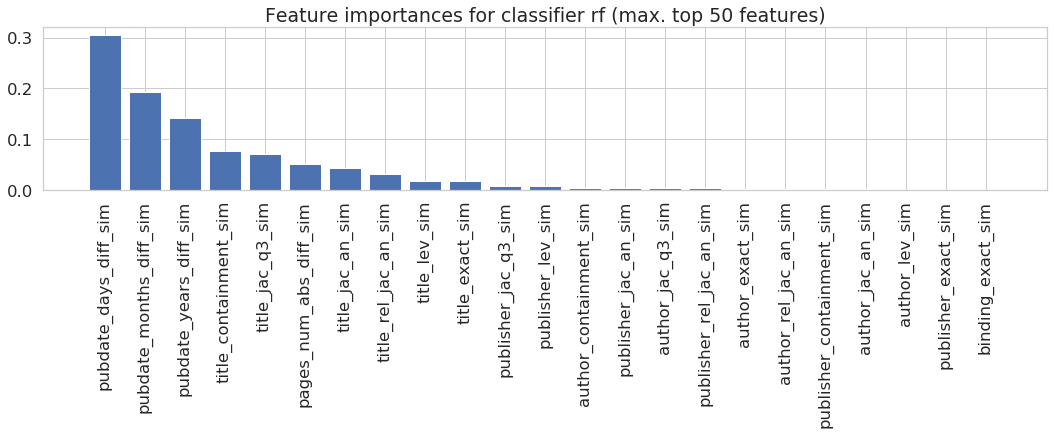

In [177]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [178]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: ban_half Whole Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'title_containment_sim', 'title_jac_q3_sim', 'pages_num_abs_diff_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'title_exact_sim', 'publisher_jac_q3_sim', 'publisher_lev_sim']"
matching_relevant_attributes_datatypes,"{'date', 'num', 'str'}"
matching_relevant_attributes,"{'pubdate', 'title', 'pages', 'publisher'}"
matching_relevant_attributes_count,4
matching_relevant_attributes_density,0.980000
top_matching_relevant_features_count,1
F1_xval_max,0.960000
F1_xval_top_matching_relevant_features,0.950000
top_matching_relevant_features,['pubdate_days_diff_sim']
top_relevant_attributes,{'pubdate'}


### Data Profiling wor_half

In [179]:
ds1_name = 'wor'
ds2_name = 'half'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

###### Training Set

In [180]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [181]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=wor ds2=half Training Set
#ds1,48792
#ds2,3099
#record_pairs,1835
#attr,6
#non-match,917
#match,918
ratio_pos,0.500272
ratio_neg,0.499728
#short_string_attr,3
#long_string_attr,0


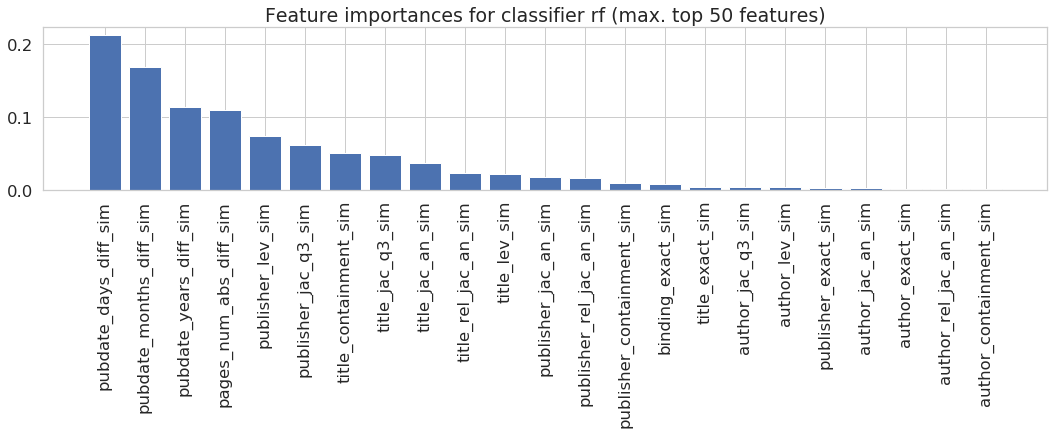

In [182]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [183]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: wor_half Training Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'pages_num_abs_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim', 'title_containment_sim', 'title_jac_q3_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'publisher_jac_an_sim', 'publisher_rel_jac_an_sim', 'publisher_containment_sim', 'binding_exact_sim']"
matching_relevant_attributes_datatypes,"{'custom', 'date', 'str', 'num'}"
matching_relevant_attributes,"{'pubdate', 'binding', 'pages', 'publisher', 'title'}"
matching_relevant_attributes_count,5
matching_relevant_attributes_density,0.940000
top_matching_relevant_features_count,5
F1_xval_max,0.860000
F1_xval_top_matching_relevant_features,0.830000
top_matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'pages_num_abs_diff_sim', 'publisher_lev_sim']"
top_relevant_attributes,"{'pubdate', 'pages', 'publisher'}"


###### Test Set

In [184]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [185]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=wor ds2=half Test Set
#ds1,48792
#ds2,3099
#record_pairs,905
#attr,6
#non-match,453
#match,452
ratio_pos,0.499448
ratio_neg,0.500552
#short_string_attr,3
#long_string_attr,0


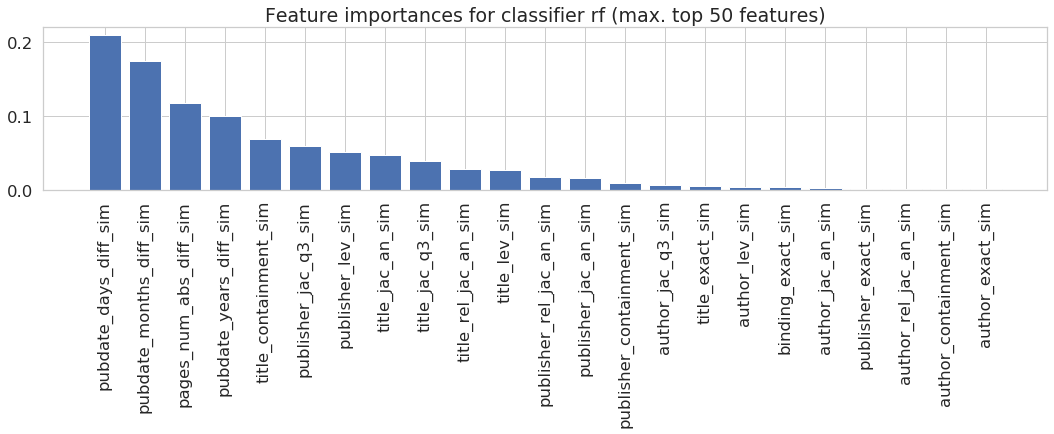

In [186]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [187]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: wor_half Test Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pages_num_abs_diff_sim', 'pubdate_years_diff_sim', 'title_containment_sim', 'publisher_jac_q3_sim', 'publisher_lev_sim', 'title_jac_an_sim', 'title_jac_q3_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'publisher_rel_jac_an_sim', 'publisher_jac_an_sim', 'publisher_containment_sim', 'author_jac_q3_sim', 'title_exact_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str', 'num'}"
matching_relevant_attributes,"{'pubdate', 'pages', 'publisher', 'author', 'title'}"
matching_relevant_attributes_count,5
matching_relevant_attributes_density,0.990000
top_matching_relevant_features_count,3
F1_xval_max,0.880000
F1_xval_top_matching_relevant_features,0.850000
top_matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pages_num_abs_diff_sim']"
top_relevant_attributes,"{'pubdate', 'pages'}"


##### The whole Dataset

In [188]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [189]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=wor ds2=half Whole Set
#ds1,48792
#ds2,3099
#record_pairs,2740
#attr,6
#non-match,1370
#match,1370
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,3
#long_string_attr,0


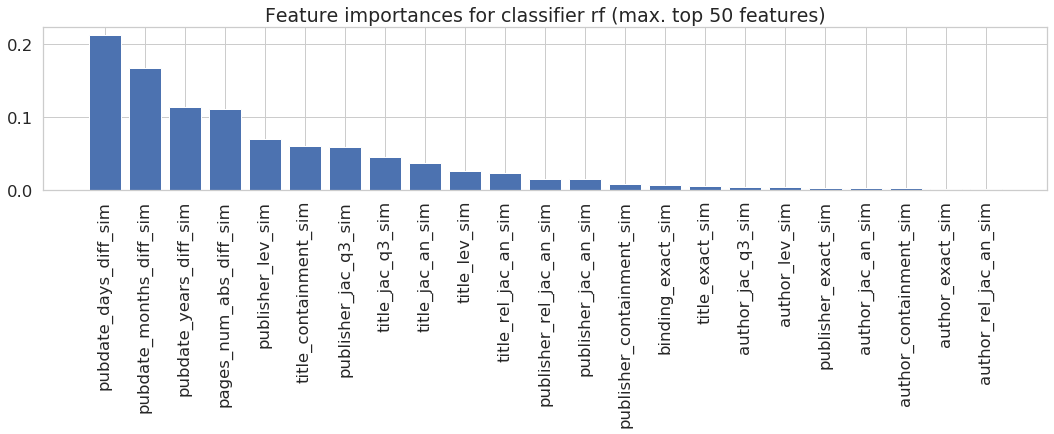

In [190]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [191]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: wor_half Whole Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'pages_num_abs_diff_sim', 'publisher_lev_sim', 'title_containment_sim', 'publisher_jac_q3_sim', 'title_jac_q3_sim', 'title_jac_an_sim', 'title_lev_sim', 'title_rel_jac_an_sim', 'publisher_rel_jac_an_sim', 'publisher_jac_an_sim', 'publisher_containment_sim', 'binding_exact_sim', 'title_exact_sim']"
matching_relevant_attributes_datatypes,"{'custom', 'date', 'str', 'num'}"
matching_relevant_attributes,"{'pubdate', 'binding', 'pages', 'publisher', 'title'}"
matching_relevant_attributes_count,5
matching_relevant_attributes_density,0.940000
top_matching_relevant_features_count,5
F1_xval_max,0.870000
F1_xval_top_matching_relevant_features,0.840000
top_matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'pages_num_abs_diff_sim', 'publisher_lev_sim']"
top_relevant_attributes,"{'pubdate', 'pages', 'publisher'}"


### Data Profiling bx_half

In [192]:
ds1_name = 'bx'
ds2_name = 'half'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

###### Training Set

In [193]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [194]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=bx ds2=half Training Set
#ds1,270948
#ds2,3099
#record_pairs,737
#attr,6
#non-match,368
#match,369
ratio_pos,0.500678
ratio_neg,0.499322
#short_string_attr,3
#long_string_attr,0


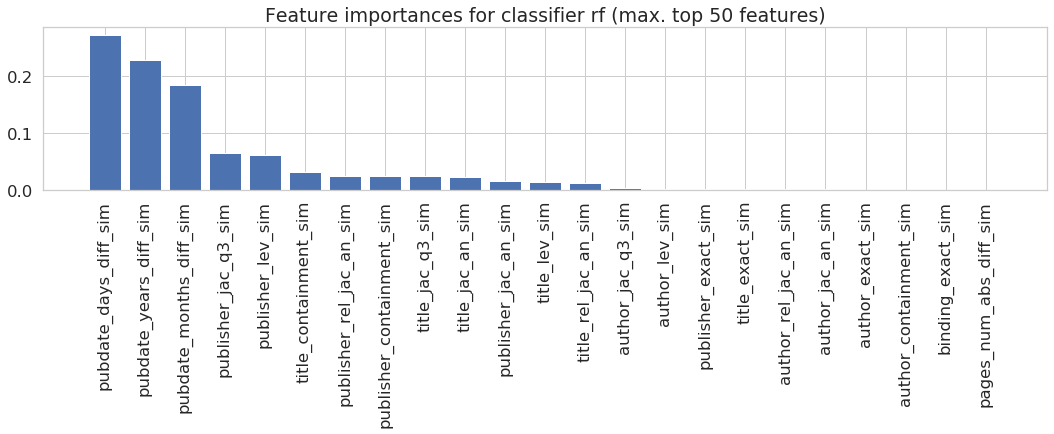

In [195]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [196]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: bx_half Training Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'pubdate_months_diff_sim', 'publisher_jac_q3_sim', 'publisher_lev_sim', 'title_containment_sim', 'publisher_rel_jac_an_sim', 'publisher_containment_sim', 'title_jac_q3_sim', 'title_jac_an_sim', 'publisher_jac_an_sim', 'title_lev_sim', 'title_rel_jac_an_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'pubdate', 'title', 'publisher'}"
matching_relevant_attributes_count,3
matching_relevant_attributes_density,0.990000
top_matching_relevant_features_count,1
F1_xval_max,0.920000
F1_xval_top_matching_relevant_features,0.890000
top_matching_relevant_features,['pubdate_days_diff_sim']
top_relevant_attributes,{'pubdate'}


###### Test Set

In [197]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [198]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=bx ds2=half Test Set
#ds1,270948
#ds2,3099
#record_pairs,363
#attr,6
#non-match,182
#match,181
ratio_pos,0.498623
ratio_neg,0.501377
#short_string_attr,3
#long_string_attr,0


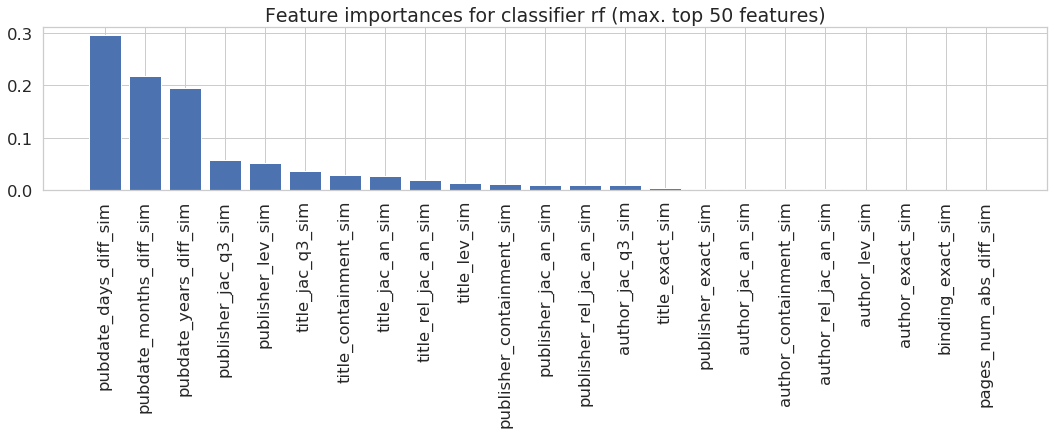

In [199]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [200]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: bx_half Test Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'publisher_jac_q3_sim', 'publisher_lev_sim', 'title_jac_q3_sim', 'title_containment_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'publisher_containment_sim', 'publisher_jac_an_sim', 'publisher_rel_jac_an_sim', 'author_jac_q3_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'author', 'pubdate', 'title', 'publisher'}"
matching_relevant_attributes_count,4
matching_relevant_attributes_density,1.000000
top_matching_relevant_features_count,1
F1_xval_max,0.890000
F1_xval_top_matching_relevant_features,0.870000
top_matching_relevant_features,['pubdate_days_diff_sim']
top_relevant_attributes,{'pubdate'}


##### The whole Dataset

In [201]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [202]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=bx ds2=half Whole Set
#ds1,270948
#ds2,3099
#record_pairs,1100
#attr,6
#non-match,550
#match,550
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,3
#long_string_attr,0


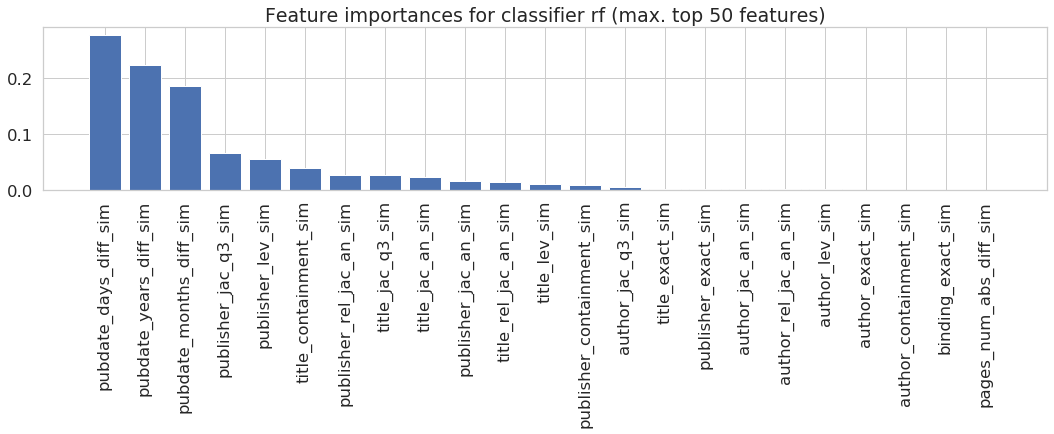

In [203]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [204]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: bx_half Whole Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim', 'pubdate_months_diff_sim', 'publisher_jac_q3_sim', 'publisher_lev_sim', 'title_containment_sim', 'publisher_rel_jac_an_sim', 'title_jac_q3_sim', 'title_jac_an_sim', 'publisher_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'publisher_containment_sim', 'author_jac_q3_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str'}"
matching_relevant_attributes,"{'author', 'pubdate', 'title', 'publisher'}"
matching_relevant_attributes_count,4
matching_relevant_attributes_density,0.990000
top_matching_relevant_features_count,2
F1_xval_max,0.920000
F1_xval_top_matching_relevant_features,0.900000
top_matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_years_diff_sim']"
top_relevant_attributes,{'pubdate'}


### Data Profiling ban_wor

In [205]:
ds1_name = 'ban'
ds2_name = 'wor'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

###### Training Set

In [206]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [207]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=ban ds2=wor Training Set
#ds1,17629
#ds2,48792
#record_pairs,1299
#attr,6
#non-match,649
#match,650
ratio_pos,0.500385
ratio_neg,0.499615
#short_string_attr,3
#long_string_attr,0


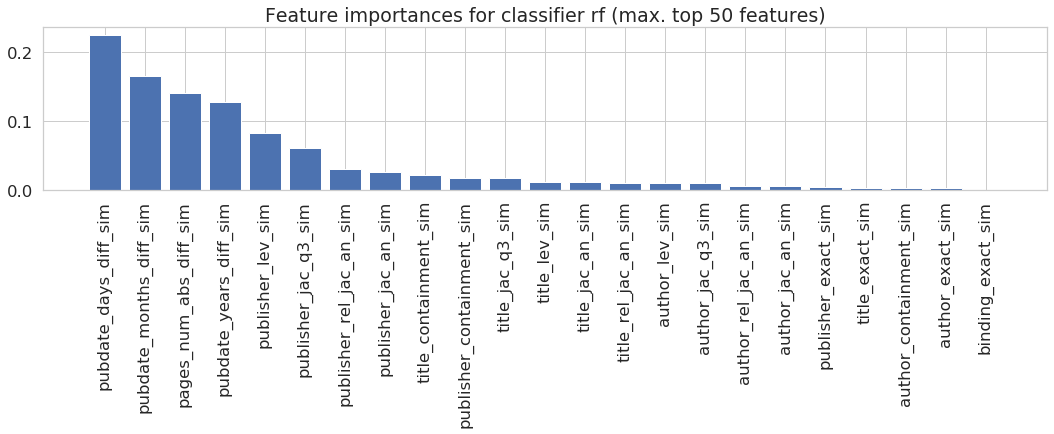

In [208]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [209]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: ban_wor Training Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pages_num_abs_diff_sim', 'pubdate_years_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim', 'publisher_rel_jac_an_sim', 'publisher_jac_an_sim', 'title_containment_sim', 'publisher_containment_sim', 'title_jac_q3_sim', 'title_lev_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'author_lev_sim', 'author_jac_q3_sim', 'author_rel_jac_an_sim', 'author_jac_an_sim', 'publisher_exact_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str', 'num'}"
matching_relevant_attributes,"{'pubdate', 'pages', 'publisher', 'author', 'title'}"
matching_relevant_attributes_count,5
matching_relevant_attributes_density,0.990000
top_matching_relevant_features_count,3
F1_xval_max,0.870000
F1_xval_top_matching_relevant_features,0.830000
top_matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pages_num_abs_diff_sim']"
top_relevant_attributes,"{'pubdate', 'pages'}"


###### Test Set

In [210]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [211]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=ban ds2=wor Test Set
#ds1,17629
#ds2,48792
#record_pairs,641
#attr,6
#non-match,321
#match,320
ratio_pos,0.49922
ratio_neg,0.50078
#short_string_attr,3
#long_string_attr,0


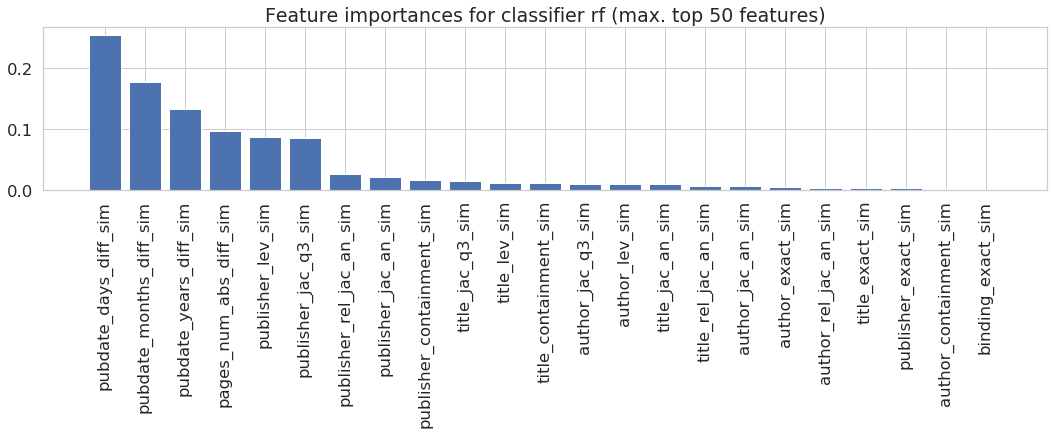

In [212]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [213]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: ban_wor Test Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'pages_num_abs_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim', 'publisher_rel_jac_an_sim', 'publisher_jac_an_sim', 'publisher_containment_sim', 'title_jac_q3_sim', 'title_lev_sim', 'title_containment_sim', 'author_jac_q3_sim', 'author_lev_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'author_jac_an_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str', 'num'}"
matching_relevant_attributes,"{'pubdate', 'pages', 'publisher', 'author', 'title'}"
matching_relevant_attributes_count,5
matching_relevant_attributes_density,0.990000
top_matching_relevant_features_count,1
F1_xval_max,0.840000
F1_xval_top_matching_relevant_features,0.800000
top_matching_relevant_features,['pubdate_days_diff_sim']
top_relevant_attributes,{'pubdate'}


##### The whole Dataset

In [214]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','isbn']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [215]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/books/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=ban ds2=wor Whole Set
#ds1,17629
#ds2,48792
#record_pairs,1940
#attr,6
#non-match,970
#match,970
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,3
#long_string_attr,0


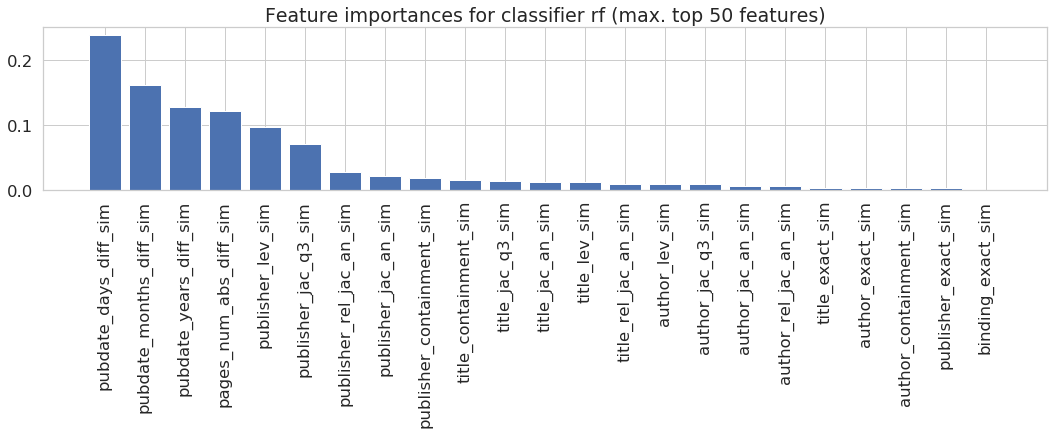

In [216]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [217]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/books/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: ban_wor Whole Set
matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'pages_num_abs_diff_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim', 'publisher_rel_jac_an_sim', 'publisher_jac_an_sim', 'publisher_containment_sim', 'title_containment_sim', 'title_jac_q3_sim', 'title_jac_an_sim', 'title_lev_sim', 'title_rel_jac_an_sim', 'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim', 'author_rel_jac_an_sim']"
matching_relevant_attributes_datatypes,"{'date', 'str', 'num'}"
matching_relevant_attributes,"{'pubdate', 'pages', 'publisher', 'author', 'title'}"
matching_relevant_attributes_count,5
matching_relevant_attributes_density,0.990000
top_matching_relevant_features_count,4
F1_xval_max,0.850000
F1_xval_top_matching_relevant_features,0.820000
top_matching_relevant_features,"['pubdate_days_diff_sim', 'pubdate_months_diff_sim', 'pubdate_years_diff_sim', 'pages_num_abs_diff_sim']"
top_relevant_attributes,"{'pubdate', 'pages'}"


## Free some space

In [218]:
#del ds1
#del ds2
#%reset Out

## Calculate Passive Learning Benchmark

In [219]:
random_state = 42
estimators_super = {
    'logreg':LogisticRegression(random_state=random_state,solver='liblinear',max_iter=1000),
    'logregcv':LogisticRegressionCV(random_state=random_state,cv=5,solver='liblinear',max_iter=1000),
    'svm':LinearSVC(random_state=random_state,dual=False),
    'dectree':DecisionTreeClassifier(random_state=random_state),
    'randforest':RandomForestClassifier(random_state=random_state,n_estimators=10),
    #'svm':SVC(random_state=random_state,kernel='linear'),
    'xgb':xgb.XGBClassifier(random_state=random_state,objective="binary:logistic")}#,
    #'gpc':GaussianProcessClassifier(random_state=random_state)}

In [220]:
#candsets_super_results = dex.returnSuperBMsInDict(candsets_train,candsets_test,estimators_super,
#                                                  all_feature,progress_bar=True)

In [158]:
#sup.saveResultsToJSON(candsets_super_results,'../results/benchmarks/books_candsets_super_results')

Saved in ../results/benchmarks/books_candsets_super_results.json


In [156]:
df_super = alut.returnDFWithSuper(candsets_super_results,filename='../results/benchmarks/books_passive_learning_baseline')

,logreg,logregcv,svm,dectree,randforest,xgb
bx_wor,0.686,0.688,0.678,0.794,0.818,0.856
bx_half,0.731,0.766,0.756,0.866,0.895,0.894
ban_bx,0.655,0.703,0.640,0.794,0.814,0.872
wor_half,0.797,0.802,0.801,0.841,0.864,0.896
ban_wor,0.682,0.708,0.709,0.788,0.830,0.846
ban_half,0.889,0.914,0.897,0.945,0.969,0.960


#### Calculate Unsupervised Benchmark

In [160]:
#candsets_unsuper_results = dex.returnUnsuperBMsInDict(candsets_test, label='label')

In [180]:
df_unsuper = alut.returnDFWithUnsuper(candsets_unsuper_results,
                                      filename='../results/benchmarks/books_unsupervised_baseline')

,F1 score,Elbow Threshold
ban_half,0.761,0.668
ban_bx,0.656,0.438
ban_wor,0.679,0.566
bx_wor,0.703,0.491
bx_half,0.688,0.653
wor_half,0.699,0.541


In [181]:
#sup.saveResultsToJSON(candsets_unsuper_results,'../results/benchmarks/books_candsets_unsuper_results')

Saved in ../results/benchmarks/books_candsets_unsuper_results.json


## Calculate Domain Relatedness

In [141]:
#domain_relatedness = dex.calcDomainRelatednessCVinDict(candsets, all_feature, dense_features_dict, cv=5, metric='phi')

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [154]:
dr = pd.DataFrame.from_dict(domain_relatedness,orient='index').apply(lambda x: round(x,3))

In [156]:
#sup.saveResultsToJSON(domain_relatedness,'../results/data_profiling/books/books_domain_relatedness')

Saved in ../results/data_profiling/books/books_domain_relatedness.json


In [132]:
candsets['ban_wor'].filter(regex='pubdate').columns

Index(['pubdate_days_diff_sim', 'pubdate_months_diff_sim',
       'pubdate_years_diff_sim'],
      dtype='object')

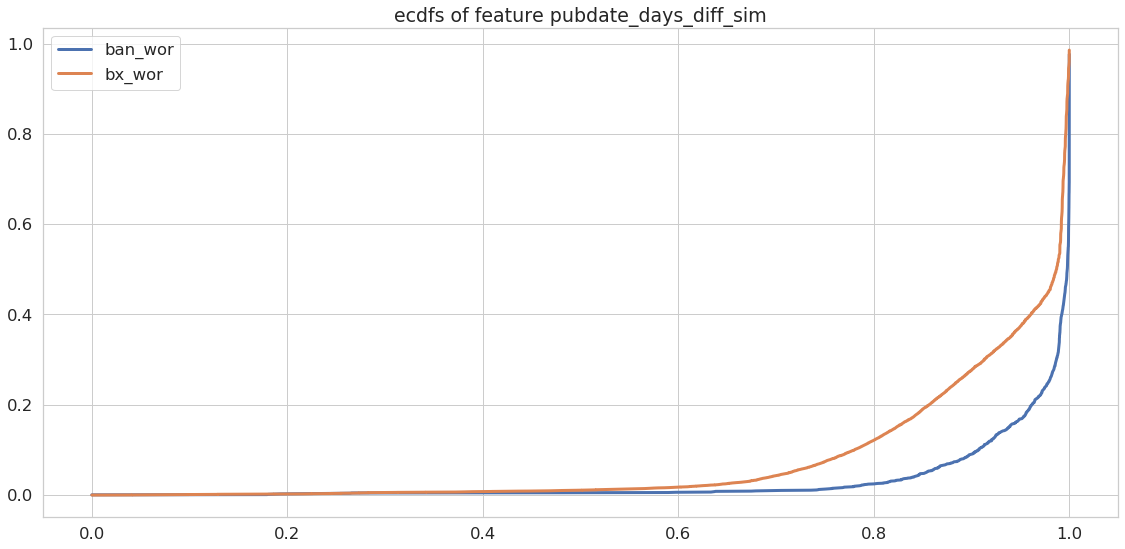

In [147]:
fig = dex.plotECDFsForFeatures('ban_wor','bx_wor',['pubdate_days_diff_sim'], candsets)
fig.savefig('../results/data_profiling/books_ban_wor_bx_wor_pubdate_ecdf.png',dpi=600,bbox_inches='tight')

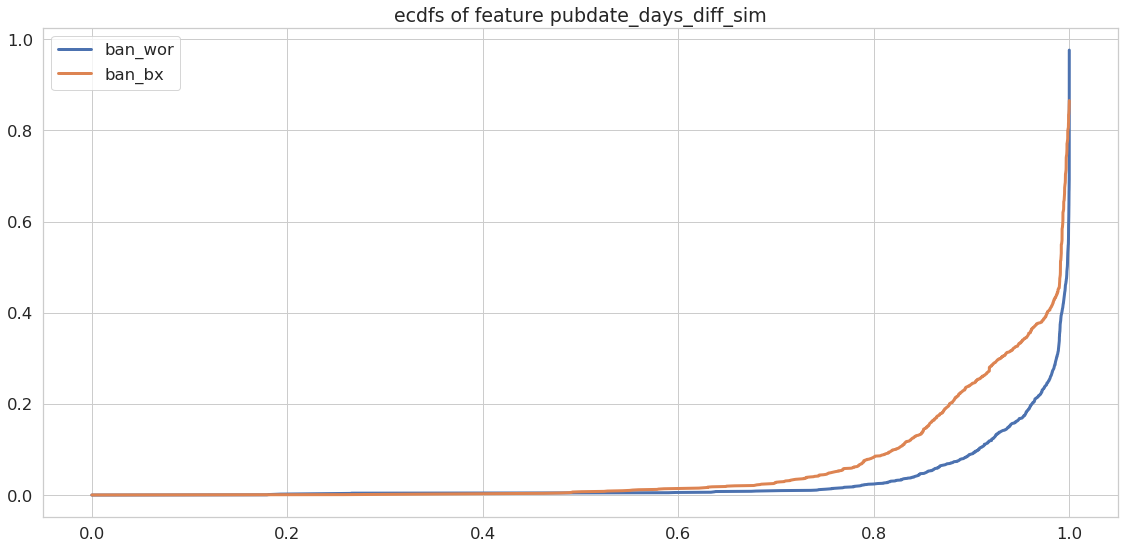

In [158]:
fig = dex.plotECDFsForFeatures('ban_wor','ban_bx',['pubdate_days_diff_sim'], candsets)
fig.savefig('../results/data_profiling/books_ban_wor_ban_bx_pubdate_ecdf.png',dpi=600,bbox_inches='tight')

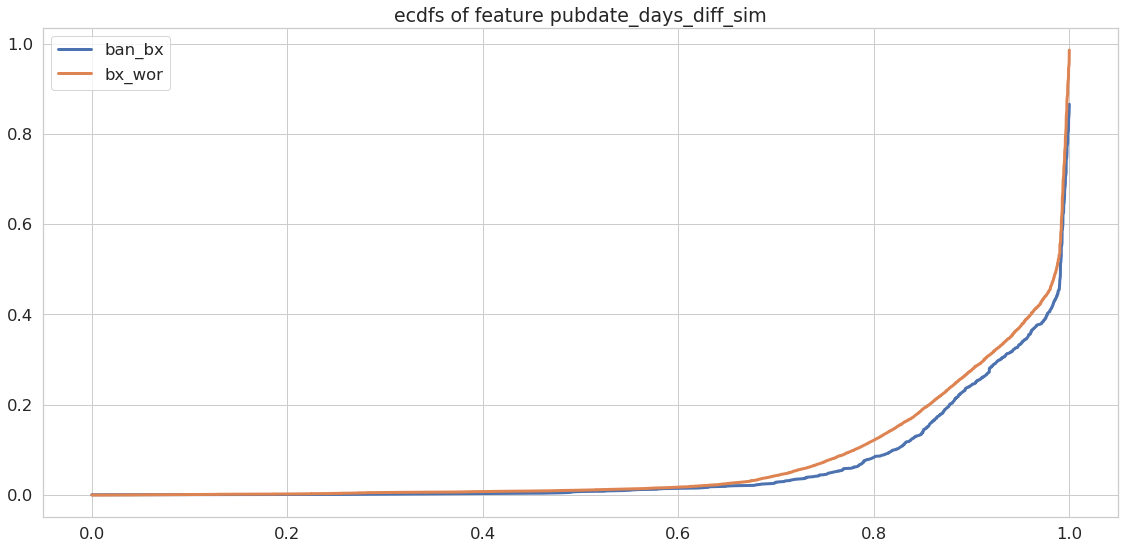

In [159]:
fig = dex.plotECDFsForFeatures('ban_bx','bx_wor',['pubdate_days_diff_sim'], candsets)

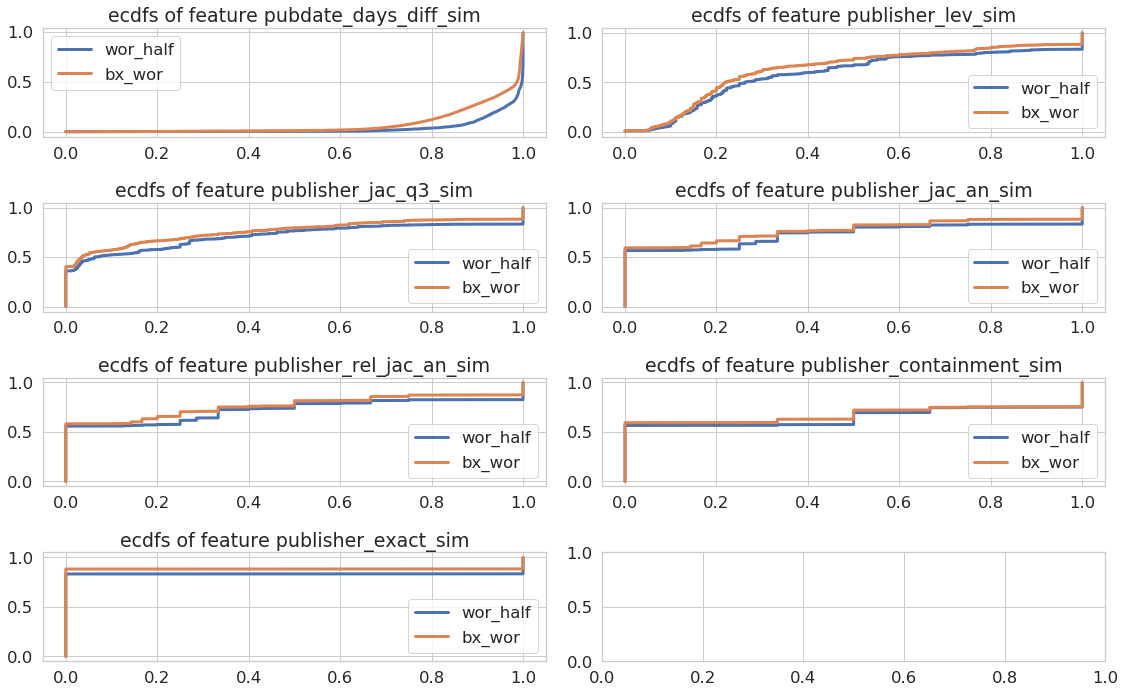

In [151]:
fig = dex.plotECDFsForFeatures('wor_half','bx_wor',['pubdate_days_diff_sim',  'publisher_lev_sim', 
                                                    'publisher_jac_q3_sim', 'publisher_jac_an_sim', 
                                                    'publisher_rel_jac_an_sim', 'publisher_containment_sim', 
                                                    'publisher_exact_sim'], candsets)

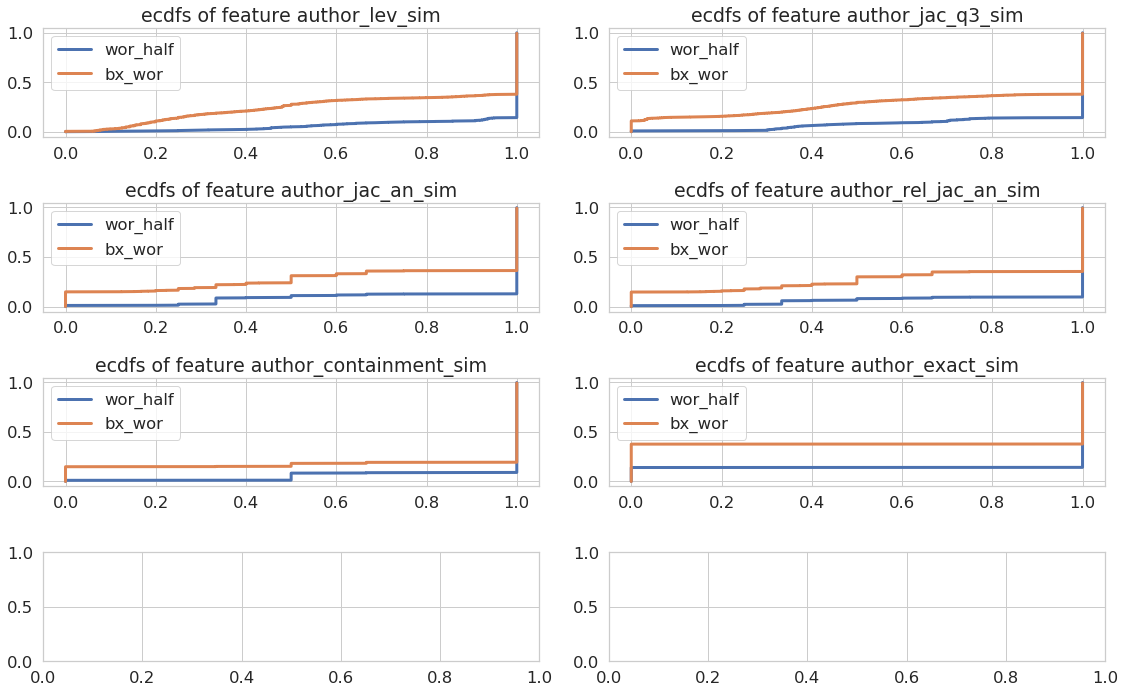

In [152]:
fig = dex.plotECDFsForFeatures('wor_half','bx_wor',['author_lev_sim', 'author_jac_q3_sim', 
                                                    'author_jac_an_sim', 'author_rel_jac_an_sim', 
                                                    'author_containment_sim', 'author_exact_sim'], candsets)

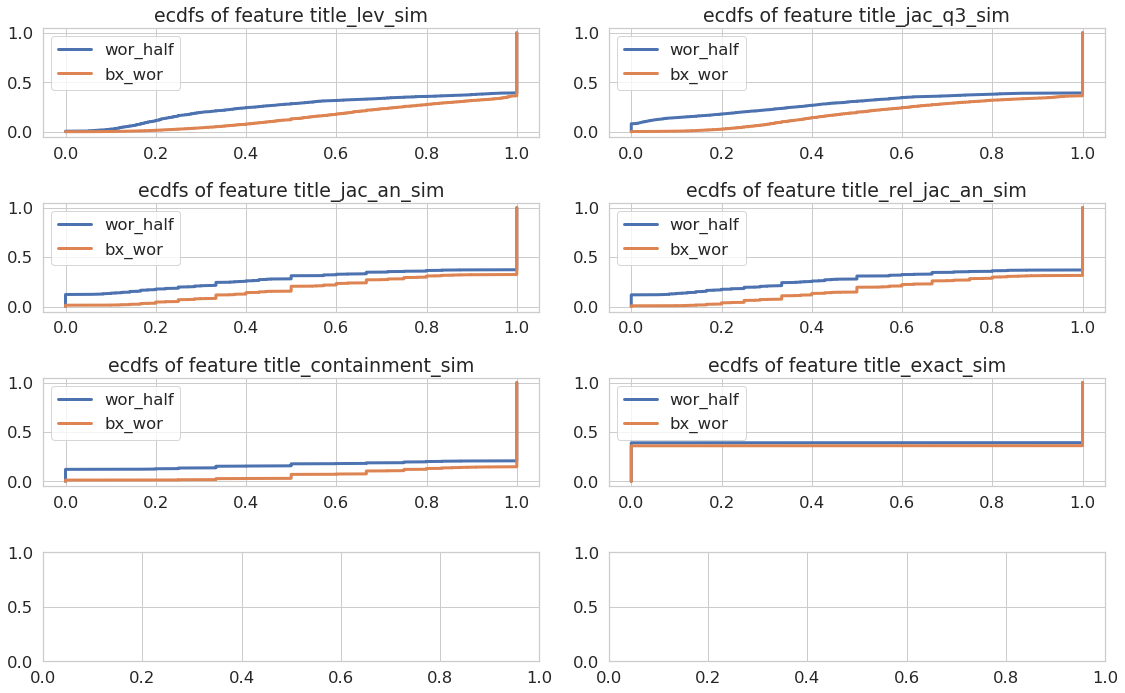

In [153]:
fig = dex.plotECDFsForFeatures('wor_half','bx_wor',['title_lev_sim', 'title_jac_q3_sim', 
                                                    'title_jac_an_sim', 'title_rel_jac_an_sim', 
                                                    'title_containment_sim', 'title_exact_sim'], candsets)

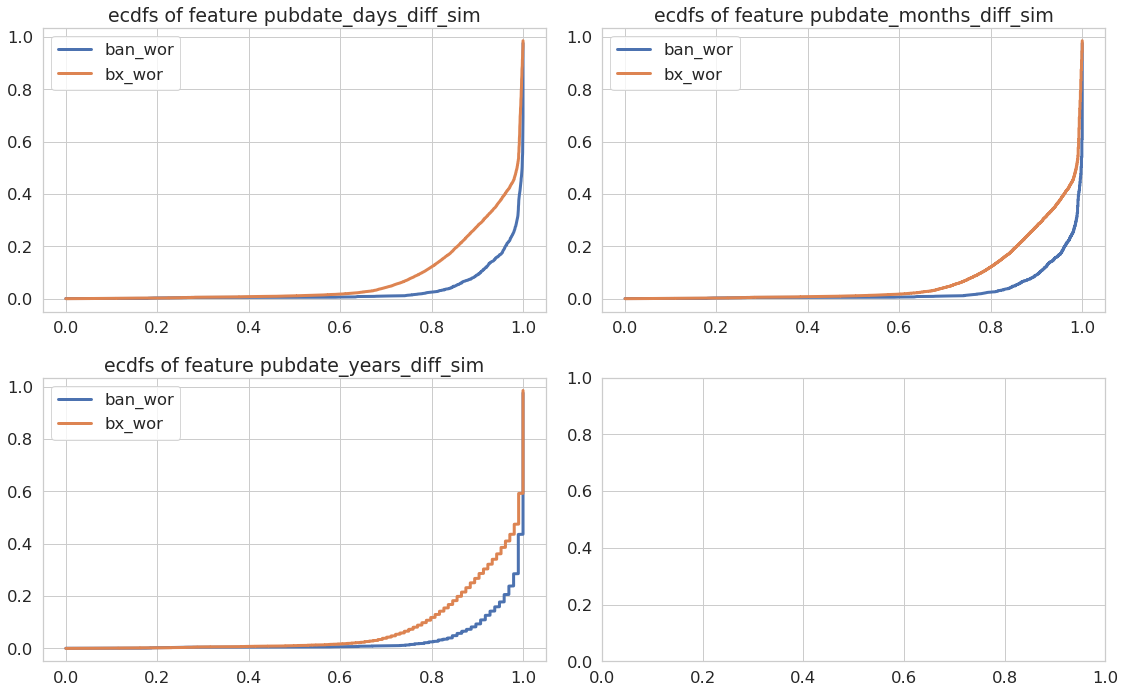

In [137]:
dex.plotECDFsForFeatures('ban_wor','bx_wor',['pubdate_days_diff_sim', 'pubdate_months_diff_sim',
       'pubdate_years_diff_sim'], candsets)

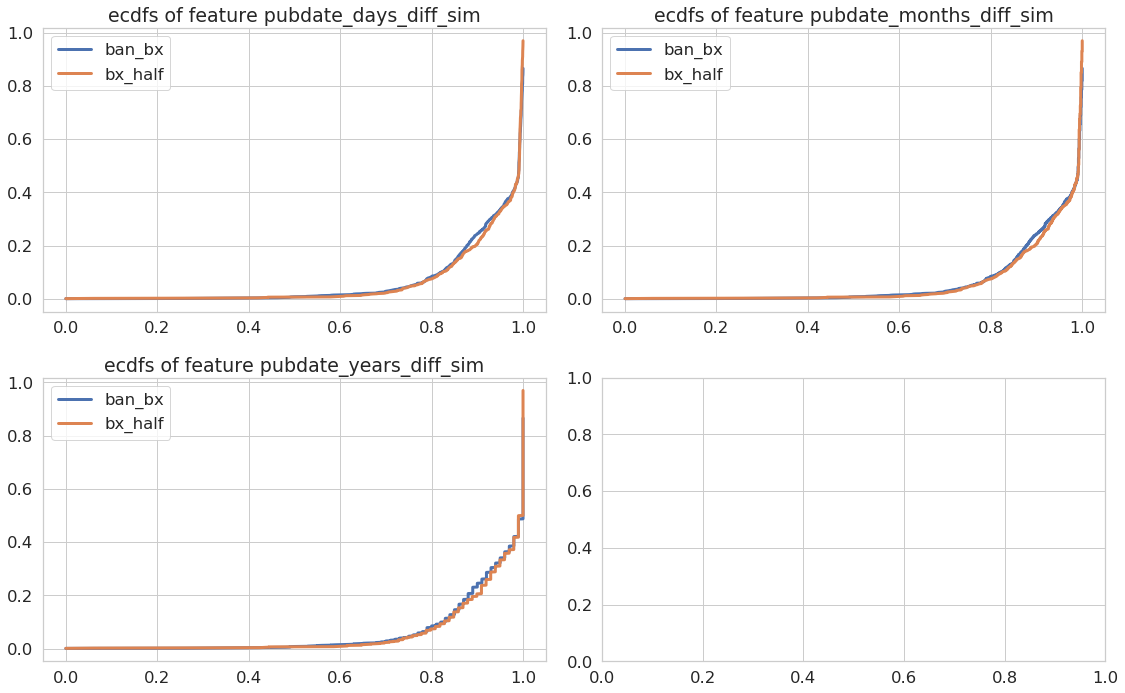

In [136]:
dex.plotECDFsForFeatures('ban_bx','bx_half',['pubdate_days_diff_sim', 'pubdate_months_diff_sim',
       'pubdate_years_diff_sim'], candsets)

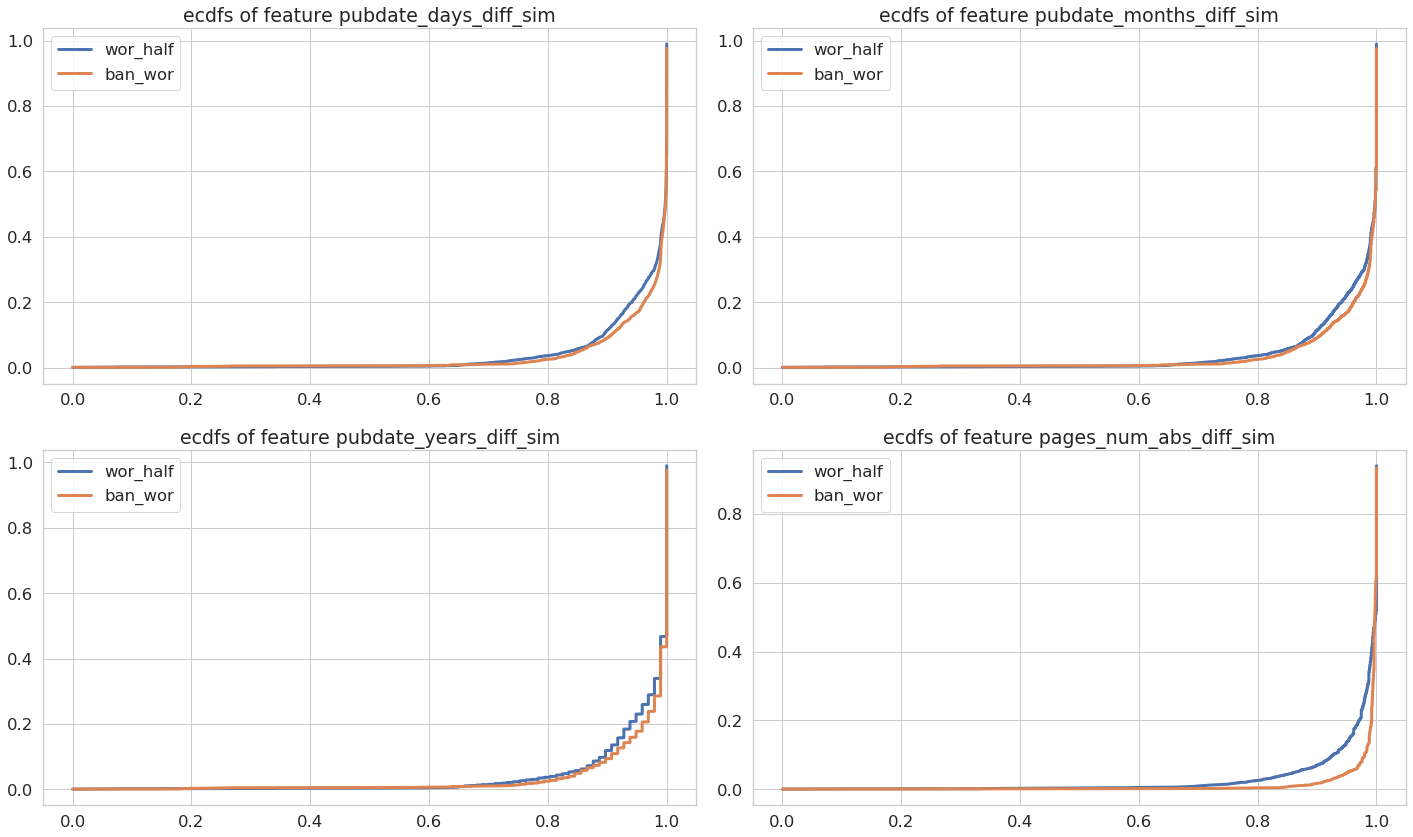

In [164]:
fig = dex.plotECDFsForFeatures('wor_half','ban_wor',['pubdate_days_diff_sim', 'pubdate_months_diff_sim',
                                                     'pubdate_years_diff_sim', 'pages_num_abs_diff_sim'], candsets)